Nama Lengkap : Asyafa Ditra Al Hauna <br>
Username : asyafa_ditra <br>
Email : aditra79@gmail.com <br>

# Get Dataset

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(train_X, train_y), (valid_X, valid_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(valid_X.shape))
print('Y_test:  '  + str(valid_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


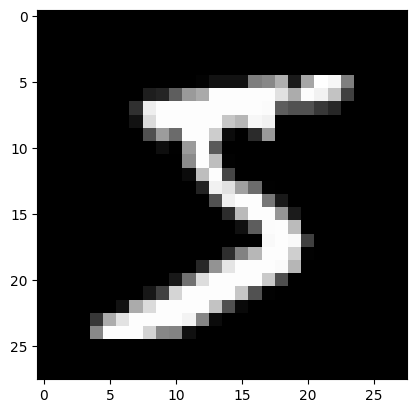

In [ ]:
plt.imshow(train_X[0], cmap='gray')
plt.show()

In [ ]:
print(f'image label {train_y[0]}')

image label 5


In [ ]:
print(f'all label in dataset {np.unique(train_y)}')

all label in dataset [0 1 2 3 4 5 6 7 8 9]


# preprocessing

In [ ]:
def reshape_and_normalize(images):

    # Reshape the images to add an extra dimension
    images = np.expand_dims(images, axis=3)

    # Normalize pixel values
    images = images / 255.0

    return images

In [ ]:
train_X = reshape_and_normalize(train_X)
valid_X = reshape_and_normalize(valid_X)

print(f"Maximum pixel value after normalization: {np.max(train_X)}\n")
print(f"Shape of training set after reshaping: {train_X.shape}\n")
print(f"Shape of one image after reshaping: {train_X[0].shape}")


Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (60000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)


# data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

# Fit the ImageDataGenerator to the training data
train_datagen.fit(train_X)

# Create the generator for training data
train_generator = train_datagen.flow(
    x=train_X,
    y=train_y,
    batch_size=4,
    shuffle=True
)

In [ ]:
validation_datagen = ImageDataGenerator(
                    rescale=1./255)

valid_generator = validation_datagen.flow(
    x=valid_X,
    y=valid_y,
    batch_size=4,
    shuffle=False
)

# build the model

In [ ]:
def convolutional_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# training

In [ ]:
model = convolutional_model()

history = model.fit(train_X, train_y, epochs=5, validation_data=(valid_X,valid_y))

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.1467 - accuracy: 0.9562 - val_loss: 0.0568 - val_accuracy: 0.9820
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0502 - accuracy: 0.9850 - val_loss: 0.0574 - val_accuracy: 0.9811
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0442 - val_accuracy: 0.9857
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0202 - accuracy: 0.9938 - val_loss: 0.0481 - val_accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0434 - val_accuracy: 0.9853


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

# evaluating

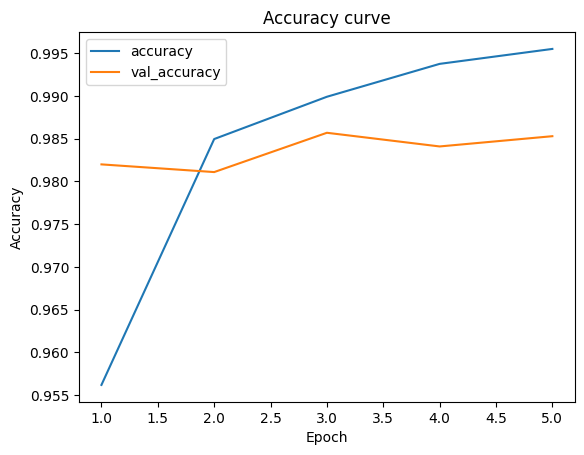

In [ ]:
my_dict = history.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy curve")
plt.legend()

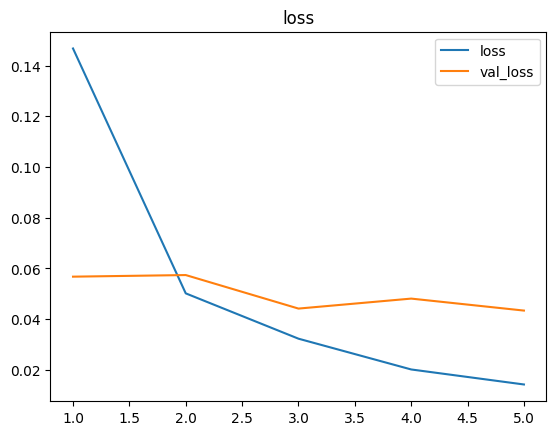

In [ ]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('loss')
plt.legend()

# Test predict uploaded image

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

def preprocess_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to (28, 28)
    resized_image = cv2.resize(image, (28, 28))

    # Normalize the pixel values to be between 0 and 1
    normalized_image = resized_image / 255.0

    # Add a channel dimension to make it (1, 28, 28, 1)
    processed_image = np.expand_dims(normalized_image, axis=0)
    processed_image = np.expand_dims(processed_image, axis=-1)

    return processed_image

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn


  img = image.load_img(path, target_size=(28,28))
  plt.imshow(img)
  plt.show()

  images = preprocess_image(path)

  print(f'Image size after preprocessing : {images.shape}')

  classes = model.predict(images)

  print(f'\nthe file name : {fn}')
  print(f'\nclasses probability : {classes}')

Exception ignored in: <function _xla_gc_callback at 0x7a5970289870>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [ ]:
max_index = np.argmax(classes)

print("The image have class of : ", max_index)

The image have class of :  6
